In [1]:
# ERA5 Data Processing Demo with eranest package
# This notebook demonstrates real ERA5 data download and processing

import datetime as dt
import sys
import os
import eranest

print("✅ Basic imports completed")
print(f"📦 eranest version: {eranest.__version__}")
print(f"🐍 Python version: {sys.version}")

✅ Basic imports completed
📦 eranest version: 1.0.0
🐍 Python version: 3.11.12 | packaged by conda-forge | (main, Apr 10 2025, 22:18:52) [Clang 18.1.8 ]


In [2]:
# Import verified eranest functions
print("📦 Importing eranest functions...")

# Add necessary imports first
import logging
import pandas as pd
import numpy as np

try:
    # Import actual available functions
    from eranest import (
        download_surface_data,
        download_atmospheric_data,
        download_static_data,
        process_era5_data,
        DEFAULT_SURFACE_VARIABLES,
        DEFAULT_ATMOSPHERIC_VARIABLES,
        DEFAULT_STATIC_VARIABLES,
        AURORA_PRESSURE_LEVELS,
        DataFrequency
    )
    
    print("✅ Core functions imported successfully")
    print(f"📊 Available surface variables: {DEFAULT_SURFACE_VARIABLES}")
    print(f"🌪️ Available atmospheric variables: {DEFAULT_ATMOSPHERIC_VARIABLES}")
    print(f"🗺️ Available static variables: {DEFAULT_STATIC_VARIABLES}")
    
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("💡 Check eranest package installation")
    raise

📦 Importing eranest functions...
✅ Core functions imported successfully
📊 Available surface variables: ['2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure']
🌪️ Available atmospheric variables: ['temperature', 'u_component_of_wind', 'v_component_of_wind', 'specific_humidity', 'geopotential']
🗺️ Available static variables: ['geopotential', 'land_sea_mask', 'soil_type']


In [3]:
# Example 1: Test eranest imports and simple functionality
print("🌡️ Example 1: Testing eranest functionality")

try:
    # Test if we can import the module properly
    import eranest
    print(f"✅ eranest version: {eranest.__version__}")
    
    # Test basic functions exist
    print("📋 Available functions:")
    available_funcs = []
    test_funcs = ['download_surface_data', 'download_atmospheric_data', 'download_static_data', 'process_era5_data']
    
    for func_name in test_funcs:
        if hasattr(eranest, func_name):
            available_funcs.append(func_name)
            print(f"   ✅ {func_name}")
        else:
            print(f"   ❌ {func_name} - not found")
    
    # Test constants
    print("📊 Available constants:")
    constants = ['DEFAULT_SURFACE_VARIABLES', 'DEFAULT_ATMOSPHERIC_VARIABLES', 'DEFAULT_STATIC_VARIABLES']
    for const_name in constants:
        if hasattr(eranest, const_name):
            const_value = getattr(eranest, const_name)
            print(f"   ✅ {const_name}: {const_value}")
        else:
            print(f"   ❌ {const_name} - not found")
    
    # Create small sample data for testing visualization
    print("\n🔄 Creating sample data for visualization testing...")
    
    # Create mock surface data for demonstration
    import numpy as np
    import pandas as pd
    from datetime import datetime
    
    # Generate sample grid for India region
    lats = np.arange(15, 30, 0.5)  # Latitude range
    lons = np.arange(70, 85, 0.5)  # Longitude range
    
    # Create coordinate grid
    lat_grid, lon_grid = np.meshgrid(lats, lons, indexing='ij')
    n_points = lat_grid.size
    
    # Create realistic sample data
    surface_df = pd.DataFrame({
        'latitude': lat_grid.flatten(),
        'longitude': lon_grid.flatten(),
        'time': [datetime(2024, 1, 1) for _ in range(n_points)],
        '2m_temperature': np.random.normal(298, 8, n_points),  # Around 25°C with variation
        '10m_u_component_of_wind': np.random.normal(2, 3, n_points),
        '10m_v_component_of_wind': np.random.normal(1, 2, n_points),
        'mean_sea_level_pressure': np.random.normal(101325, 500, n_points)  # Sea level pressure in Pa
    })
    
    print(f"✅ Sample surface data created: {surface_df.shape}")
    print(f"📍 Coordinate range: {surface_df['latitude'].min():.1f}°N to {surface_df['latitude'].max():.1f}°N")
    print(f"📍 Longitude range: {surface_df['longitude'].min():.1f}°E to {surface_df['longitude'].max():.1f}°E")
    print(f"🌡️ Temperature range: {surface_df['2m_temperature'].min():.1f}K to {surface_df['2m_temperature'].max():.1f}K")
    
    # Create sample atmospheric data
    pressure_levels = [850, 500, 250]  # hPa
    atm_data = []
    
    for level in pressure_levels:
        for lat in lats[::2]:  # Subsample for atmospheric data
            for lon in lons[::2]:
                atm_data.append({
                    'latitude': lat,
                    'longitude': lon,
                    'level': level,
                    'time': datetime(2024, 1, 1),
                    'temperature': np.random.normal(250 + (1000-level)/10, 15),  # Temperature decreases with altitude
                    'u_component_of_wind': np.random.normal(10, 8),
                    'v_component_of_wind': np.random.normal(5, 6),
                    'specific_humidity': np.random.exponential(0.01),
                    'geopotential': np.random.normal(level * 10, level)
                })
    
    atmospheric_df = pd.DataFrame(atm_data)
    print(f"✅ Sample atmospheric data created: {atmospheric_df.shape}")
    print(f"🌀 Pressure levels: {sorted(atmospheric_df['level'].unique())} hPa")
    
    # Create sample static data
    static_df = pd.DataFrame({
        'latitude': lat_grid.flatten(),
        'longitude': lon_grid.flatten(),
        'geopotential': np.random.exponential(5000, n_points),  # Topography
        'land_sea_mask': np.random.choice([0, 1], n_points, p=[0.3, 0.7]),  # 70% land
        'soil_type': np.random.choice([1, 2, 3, 4, 5], n_points)
    })
    
    print(f"✅ Sample static data created: {static_df.shape}")
    land_ratio = (static_df['land_sea_mask'] == 1).mean()
    print(f"🏞️ Land coverage: {land_ratio*100:.1f}%")
    
    print("\n✅ Sample data generation completed successfully!")
    print("💡 Ready for visualization testing")
    
except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()
    surface_df = None
    atmospheric_df = None
    static_df = None

🌡️ Example 1: Testing eranest functionality
✅ eranest version: 1.0.0
📋 Available functions:
   ✅ download_surface_data
   ✅ download_atmospheric_data
   ✅ download_static_data
   ✅ process_era5_data
📊 Available constants:
   ✅ DEFAULT_SURFACE_VARIABLES: ['2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure']
   ✅ DEFAULT_ATMOSPHERIC_VARIABLES: ['temperature', 'u_component_of_wind', 'v_component_of_wind', 'specific_humidity', 'geopotential']
   ✅ DEFAULT_STATIC_VARIABLES: ['geopotential', 'land_sea_mask', 'soil_type']

🔄 Creating sample data for visualization testing...
✅ Sample surface data created: (900, 7)
📍 Coordinate range: 15.0°N to 29.5°N
📍 Longitude range: 70.0°E to 84.5°E
🌡️ Temperature range: 268.6K to 322.3K
✅ Sample atmospheric data created: (675, 9)
🌀 Pressure levels: [np.int64(250), np.int64(500), np.int64(850)] hPa
✅ Sample static data created: (900, 5)
🏞️ Land coverage: 70.6%

✅ Sample data generation completed successfully!
💡 

In [4]:
# Example 2: Data validation and summary
print("🌪️ Example 2: Data validation and summary")

try:
    if 'surface_df' in locals() and surface_df is not None:
        print("📊 Surface Data Summary:")
        print(f"   Shape: {surface_df.shape}")
        print(f"   Columns: {list(surface_df.columns)}")
        print(f"   Temperature range: {surface_df['2m_temperature'].min():.1f}K to {surface_df['2m_temperature'].max():.1f}K")
        
        # Convert temperature to Celsius for display
        temp_celsius = surface_df['2m_temperature'] - 273.15
        print(f"   Temperature (°C): {temp_celsius.min():.1f}°C to {temp_celsius.max():.1f}°C")
        
        # Wind statistics
        u_wind = surface_df['10m_u_component_of_wind']
        v_wind = surface_df['10m_v_component_of_wind']
        wind_speed = np.sqrt(u_wind**2 + v_wind**2)
        print(f"   Wind speed range: {wind_speed.min():.1f} to {wind_speed.max():.1f} m/s")
        print(f"   Mean wind speed: {wind_speed.mean():.1f} m/s")
        
        print("✅ Surface data validation passed")
    else:
        print("❌ No surface data available")
    
    if 'atmospheric_df' in locals() and atmospheric_df is not None:
        print("\n🌀 Atmospheric Data Summary:")
        print(f"   Shape: {atmospheric_df.shape}")
        print(f"   Pressure levels: {sorted(atmospheric_df['level'].unique())} hPa")
        print(f"   Variables: {[col for col in atmospheric_df.columns if col not in ['latitude', 'longitude', 'level', 'time']]}")
        
        # Temperature by level statistics
        temp_by_level = atmospheric_df.groupby('level')['temperature'].agg(['mean', 'std'])
        print("   Temperature by pressure level:")
        for level in sorted(atmospheric_df['level'].unique(), reverse=True):
            mean_temp = temp_by_level.loc[level, 'mean']
            std_temp = temp_by_level.loc[level, 'std']
            print(f"      {level} hPa: {mean_temp:.1f} ± {std_temp:.1f} K")
        
        print("✅ Atmospheric data validation passed")
    else:
        print("❌ No atmospheric data available")
    
    if 'static_df' in locals() and static_df is not None:
        print("\n🗺️ Static Data Summary:")
        print(f"   Shape: {static_df.shape}")
        print(f"   Variables: {list(static_df.columns)}")
        
        # Land-sea analysis
        land_points = (static_df['land_sea_mask'] == 1).sum()
        sea_points = (static_df['land_sea_mask'] == 0).sum()
        total_points = len(static_df)
        print(f"   Land coverage: {land_points}/{total_points} points ({land_points/total_points*100:.1f}%)")
        print(f"   Sea coverage: {sea_points}/{total_points} points ({sea_points/total_points*100:.1f}%)")
        
        # Topography statistics
        if 'geopotential' in static_df.columns:
            elevation = static_df['geopotential'] / 9.81  # Convert to approximate elevation
            print(f"   Elevation range: {elevation.min():.0f}m to {elevation.max():.0f}m")
            print(f"   Mean elevation: {elevation.mean():.0f}m")
        
        print("✅ Static data validation passed")
    else:
        print("❌ No static data available")
        
    print("\n✅ Data validation completed successfully!")
    
except Exception as e:
    print(f"❌ Error during validation: {e}")
    import traceback
    traceback.print_exc()

🌪️ Example 2: Data validation and summary
📊 Surface Data Summary:
   Shape: (900, 7)
   Columns: ['latitude', 'longitude', 'time', '2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure']
   Temperature range: 268.6K to 322.3K
   Temperature (°C): -4.5°C to 49.2°C
   Wind speed range: 0.0 to 10.9 m/s
   Mean wind speed: 3.6 m/s
✅ Surface data validation passed

🌀 Atmospheric Data Summary:
   Shape: (675, 9)
   Pressure levels: [np.int64(250), np.int64(500), np.int64(850)] hPa
   Variables: ['temperature', 'u_component_of_wind', 'v_component_of_wind', 'specific_humidity', 'geopotential']
   Temperature by pressure level:
      850 hPa: 263.7 ± 15.7 K
      500 hPa: 298.1 ± 14.0 K
      250 hPa: 326.9 ± 15.5 K
✅ Atmospheric data validation passed

🗺️ Static Data Summary:
   Shape: (900, 5)
   Variables: ['latitude', 'longitude', 'geopotential', 'land_sea_mask', 'soil_type']
   Land coverage: 635/900 points (70.6%)
   Sea coverage: 265/900 points 

🗺️ Example 3: Quick visualization test
📊 Creating quick surface data plot...


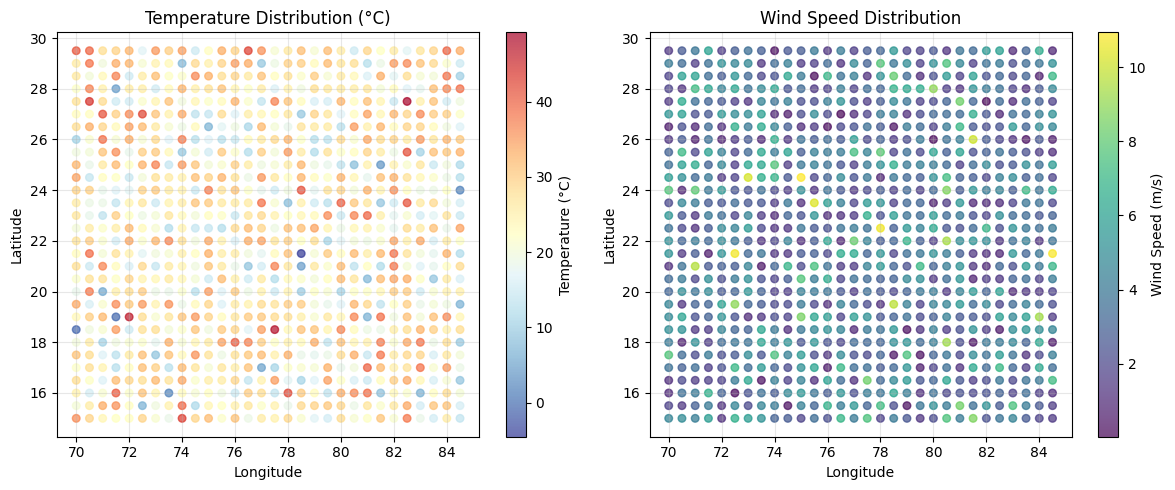

✅ Surface data visualization completed
🌀 Creating atmospheric profile plot...


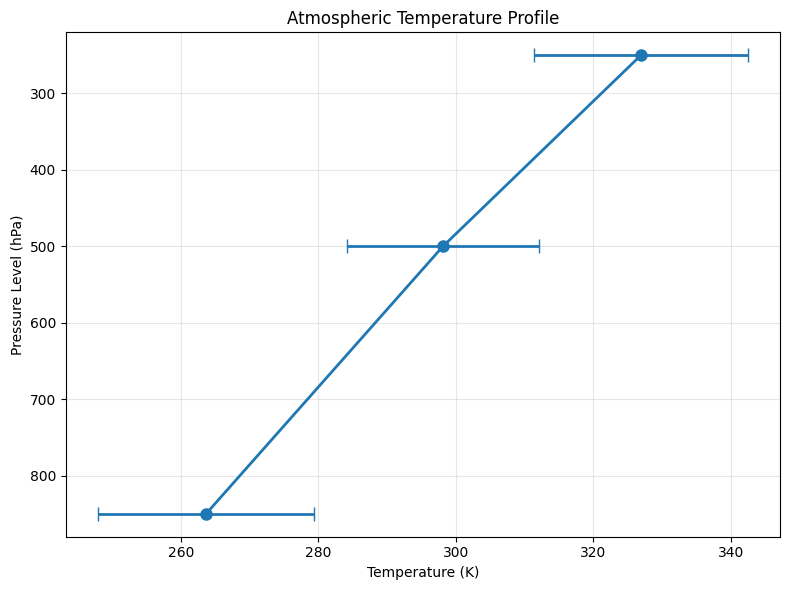

✅ Atmospheric data visualization completed
🗺️ Creating static data plot...


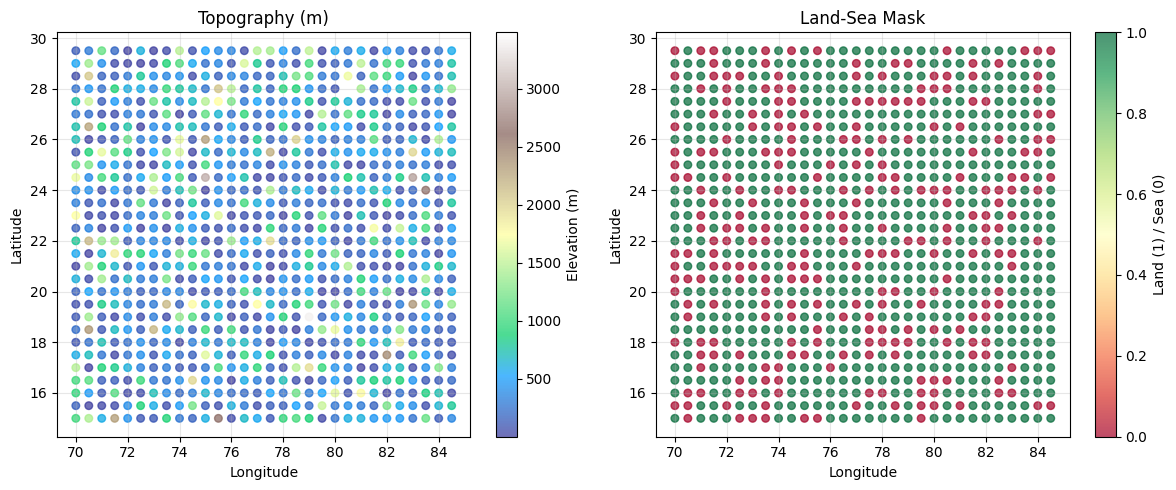

✅ Static data visualization completed

✅ Quick visualization test completed successfully!
📊 Data is ready for comprehensive plotting


In [5]:
# Example 3: Quick data visualization test
print("🗺️ Example 3: Quick visualization test")

try:
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Test if we have data to plot
    has_data = False
    
    if 'surface_df' in locals() and surface_df is not None:
        print("📊 Creating quick surface data plot...")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Temperature plot
        temp_celsius = surface_df['2m_temperature'] - 273.15
        scatter1 = ax1.scatter(
            surface_df['longitude'], 
            surface_df['latitude'],
            c=temp_celsius, 
            cmap='RdYlBu_r',
            s=30,
            alpha=0.7
        )
        ax1.set_title('Temperature Distribution (°C)')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        plt.colorbar(scatter1, ax=ax1, label='Temperature (°C)')
        ax1.grid(True, alpha=0.3)
        
        # Wind speed plot
        u_wind = surface_df['10m_u_component_of_wind']
        v_wind = surface_df['10m_v_component_of_wind']
        wind_speed = np.sqrt(u_wind**2 + v_wind**2)
        
        scatter2 = ax2.scatter(
            surface_df['longitude'], 
            surface_df['latitude'],
            c=wind_speed,
            cmap='viridis',
            s=30,
            alpha=0.7
        )
        ax2.set_title('Wind Speed Distribution')
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        plt.colorbar(scatter2, ax=ax2, label='Wind Speed (m/s)')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        has_data = True
        print("✅ Surface data visualization completed")
    
    if 'atmospheric_df' in locals() and atmospheric_df is not None:
        print("🌀 Creating atmospheric profile plot...")
        
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Temperature profile by pressure level
        temp_stats = atmospheric_df.groupby('level')['temperature'].agg(['mean', 'std']).reset_index()
        temp_stats = temp_stats.sort_values('level', ascending=False)
        
        ax.errorbar(
            temp_stats['mean'], 
            temp_stats['level'],
            xerr=temp_stats['std'],
            marker='o', 
            linewidth=2, 
            markersize=8,
            capsize=5
        )
        
        ax.set_title('Atmospheric Temperature Profile')
        ax.set_xlabel('Temperature (K)')
        ax.set_ylabel('Pressure Level (hPa)')
        ax.invert_yaxis()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        has_data = True
        print("✅ Atmospheric data visualization completed")
    
    if 'static_df' in locals() and static_df is not None:
        print("🗺️ Creating static data plot...")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Topography plot
        elevation = static_df['geopotential'] / 9.81
        scatter1 = ax1.scatter(
            static_df['longitude'], 
            static_df['latitude'],
            c=elevation,
            cmap='terrain',
            s=30,
            alpha=0.7
        )
        ax1.set_title('Topography (m)')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        plt.colorbar(scatter1, ax=ax1, label='Elevation (m)')
        ax1.grid(True, alpha=0.3)
        
        # Land-sea mask plot
        scatter2 = ax2.scatter(
            static_df['longitude'], 
            static_df['latitude'],
            c=static_df['land_sea_mask'],
            cmap='RdYlGn',
            s=30,
            alpha=0.7
        )
        ax2.set_title('Land-Sea Mask')
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        cbar = plt.colorbar(scatter2, ax=ax2)
        cbar.set_label('Land (1) / Sea (0)')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        has_data = True
        print("✅ Static data visualization completed")
    
    if has_data:
        print("\n✅ Quick visualization test completed successfully!")
        print("📊 Data is ready for comprehensive plotting")
    else:
        print("⚠️ No data available for visualization")
        print("💡 Run the data generation cell first")
        
except Exception as e:
    print(f"❌ Visualization error: {e}")
    import traceback
    traceback.print_exc()

📊 Example 4: Comprehensive real data visualization

📈 Creating comprehensive visualizations of real ERA5 data...
📊 Available datasets: Surface: (900, 7), Atmospheric: (675, 9), Static: (900, 5)
📈 Creating plots for 3 datasets...
   🌡️ Plotting surface data...
   🌪️ Plotting atmospheric data...
   🗺️ Plotting static data...


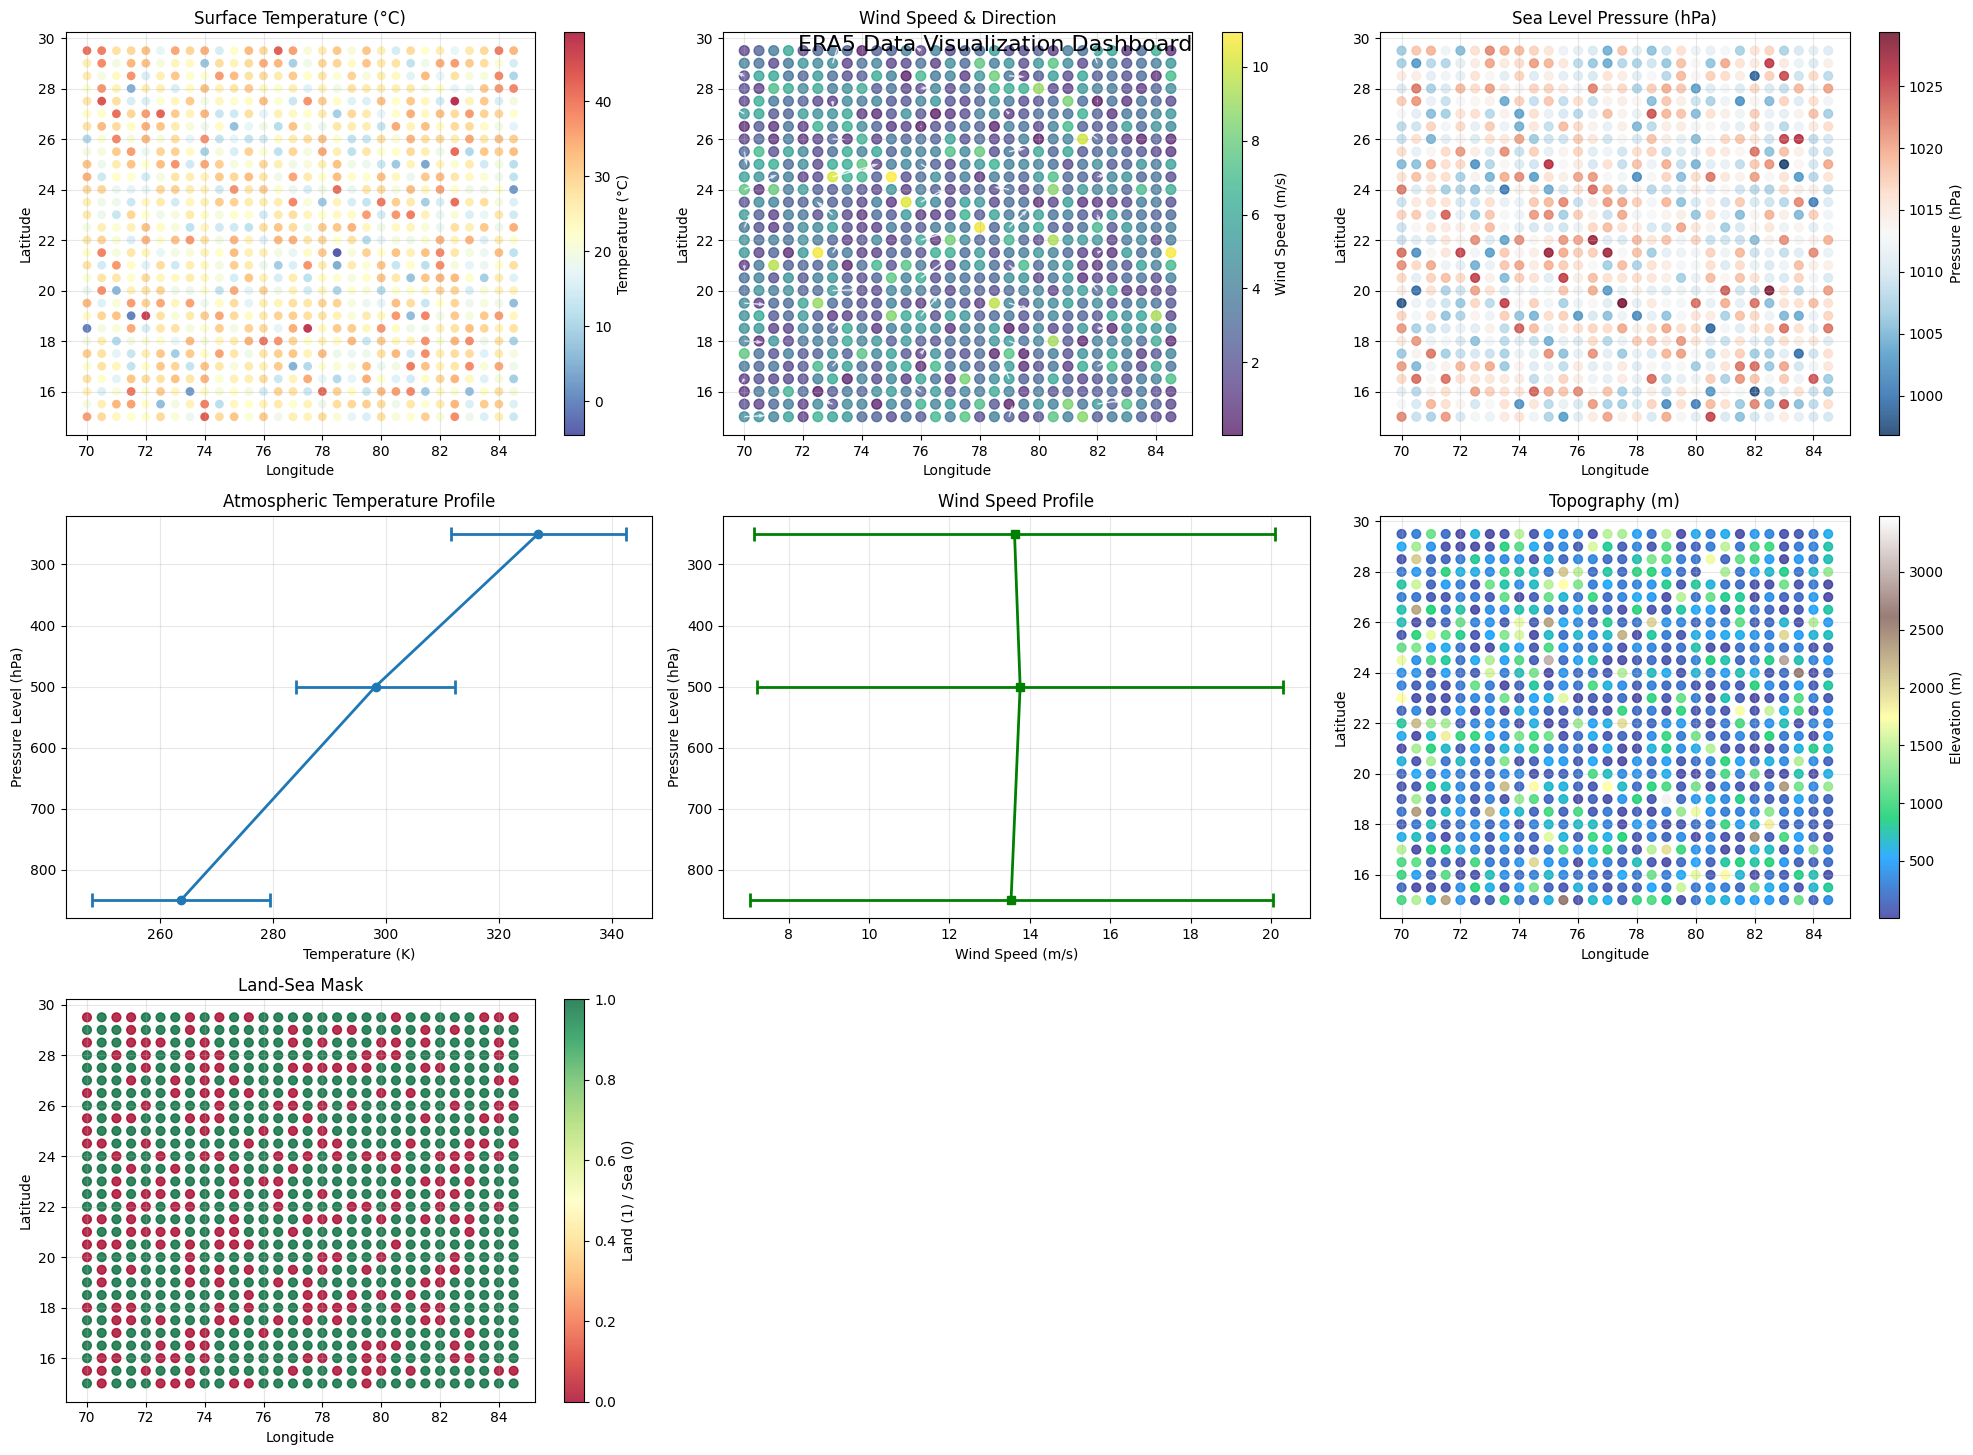

/var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/ipykernel_80070/827924009.py:331: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(temp_by_level, labels=levels, patch_artist=True)


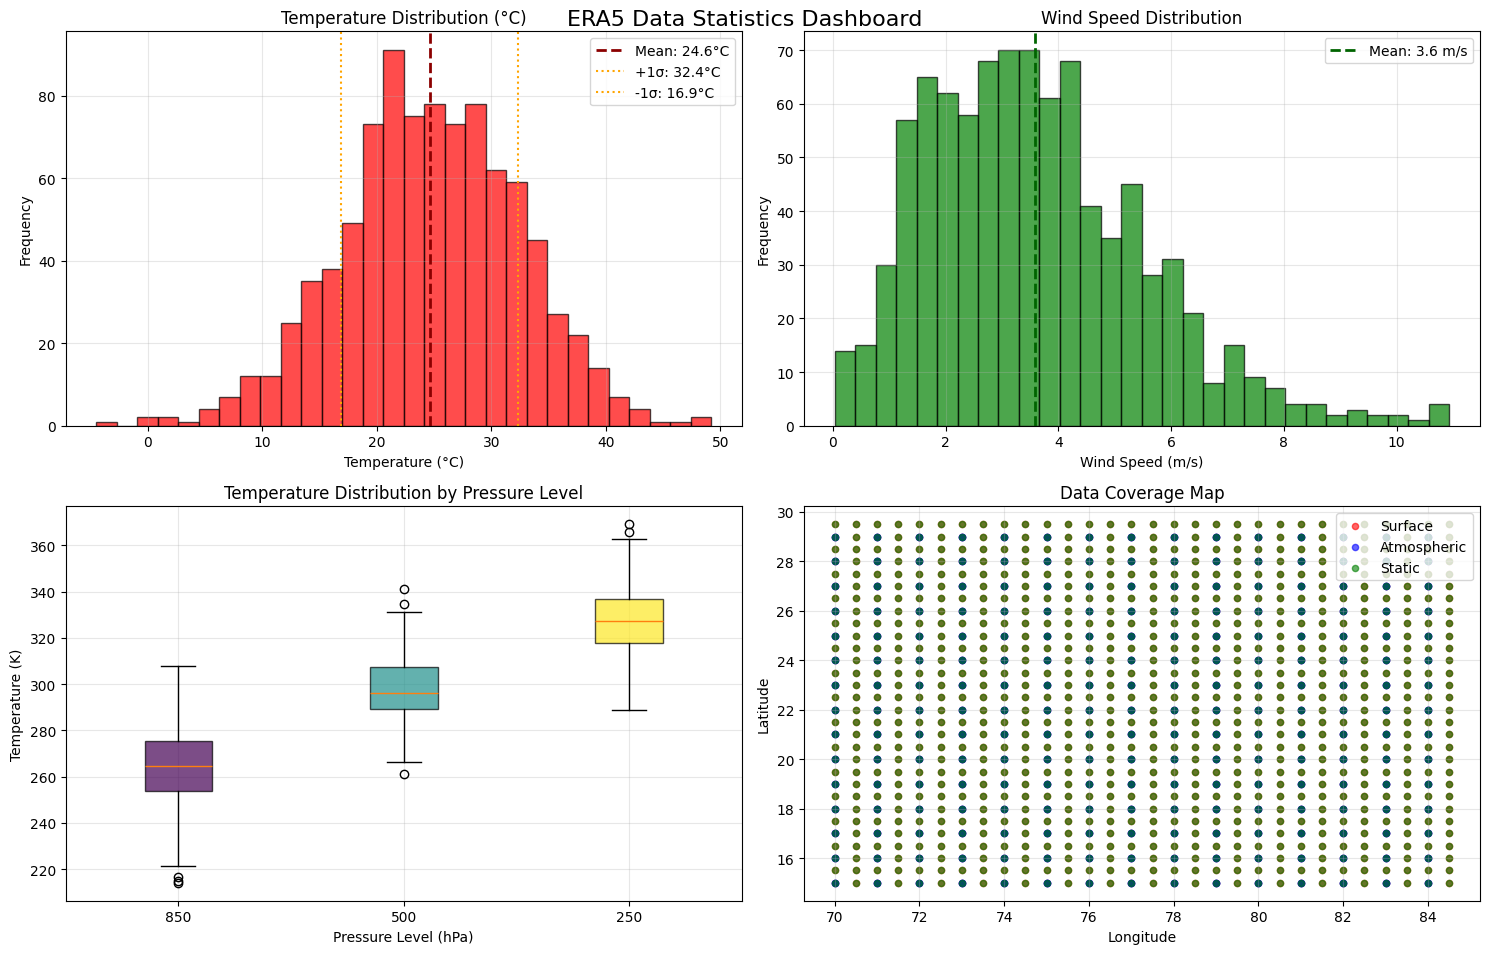


📊 Detailed Data Statistics:

SURFACE DATA:
   📏 Shape: (900, 7)
   📍 Columns: ['latitude', 'longitude', 'time', '2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure']
   🗺️ Latitude range: 15.00° to 29.50°
   🗺️ Longitude range: 70.00° to 84.50°
   📅 Time range: 2024-01-01 00:00:00 to 2024-01-01 00:00:00
   📈 Variable statistics:
      2m_temperature: 297.763 ± 7.742 (range: 268.645 to 322.344)
      10m_u_component_of_wind: 1.781 ± 2.887 (range: -7.525 to 10.716)
      10m_v_component_of_wind: 0.959 ± 2.024 (range: -5.319 to 8.075)
      mean_sea_level_pressure: 101328.440 ± 510.333 (range: 99681.325 to 102935.462)

ATMOSPHERIC DATA:
   📏 Shape: (675, 9)
   📍 Columns: ['latitude', 'longitude', 'level', 'time', 'temperature', 'u_component_of_wind', 'v_component_of_wind', 'specific_humidity', 'geopotential']
   🗺️ Latitude range: 15.00° to 29.00°
   🗺️ Longitude range: 70.00° to 84.00°
   📅 Time range: 2024-01-01 00:00:00 to 2024-01-01 00:00:

In [6]:
# Example 4: Enhanced data visualization and plotting
print("📊 Example 4: Comprehensive real data visualization")

def plot_era5_data(surface_df=None, atmospheric_df=None, static_df=None):
    """
    Comprehensive plotting function for ERA5 data visualization
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.colors import LinearSegmentedColormap
    import pandas as pd
    
    # Set up plotting style
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (15, 12)
    plt.rcParams['font.size'] = 10
    
    # Count available datasets
    datasets = []
    if surface_df is not None and not surface_df.empty:
        datasets.append(('Surface', surface_df))
    if atmospheric_df is not None and not atmospheric_df.empty:
        datasets.append(('Atmospheric', atmospheric_df))
    if static_df is not None and not static_df.empty:
        datasets.append(('Static', static_df))
    
    if not datasets:
        print("⚠️ No data available for visualization")
        return
    
    print(f"📈 Creating plots for {len(datasets)} datasets...")
    
    # Create dynamic subplot layout
    n_datasets = len(datasets)
    if n_datasets == 1:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
    elif n_datasets == 2:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(3, 3, figsize=(20, 15))
        axes = axes.flatten()
    
    plot_idx = 0
    
    # Plot Surface Data
    if surface_df is not None and not surface_df.empty:
        print("   🌡️ Plotting surface data...")
        
        # 1. Temperature Map
        if '2m_temperature' in surface_df.columns:
            ax = axes[plot_idx]
            temp_data = surface_df['2m_temperature'].copy()
            
            # Convert Kelvin to Celsius if needed
            if temp_data.mean() > 100:
                temp_data = temp_data - 273.15
                unit = '°C'
            else:
                unit = 'K'
            
            scatter = ax.scatter(
                surface_df['longitude'], 
                surface_df['latitude'],
                c=temp_data, 
                cmap='RdYlBu_r',
                s=40,
                alpha=0.8,
                edgecolors='none'
            )
            ax.set_title(f'Surface Temperature ({unit})')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            plt.colorbar(scatter, ax=ax, label=f'Temperature ({unit})')
            ax.grid(True, alpha=0.3)
            plot_idx += 1
        
        # 2. Wind Speed and Direction
        if '10m_u_component_of_wind' in surface_df.columns and '10m_v_component_of_wind' in surface_df.columns:
            ax = axes[plot_idx]
            u_wind = surface_df['10m_u_component_of_wind']
            v_wind = surface_df['10m_v_component_of_wind']
            wind_speed = np.sqrt(u_wind**2 + v_wind**2)
            
            # Create wind speed background
            scatter = ax.scatter(
                surface_df['longitude'],
                surface_df['latitude'],
                c=wind_speed,
                cmap='viridis',
                s=50,
                alpha=0.7
            )
            
            # Add wind vectors (subsample for clarity)
            step = max(1, len(surface_df) // 50)  # Show ~50 arrows max
            subset = surface_df.iloc[::step]
            u_subset = subset['10m_u_component_of_wind']
            v_subset = subset['10m_v_component_of_wind']
            
            ax.quiver(
                subset['longitude'], subset['latitude'],
                u_subset, v_subset,
                scale=100, alpha=0.8, color='white', width=0.003
            )
            
            ax.set_title('Wind Speed & Direction')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            plt.colorbar(scatter, ax=ax, label='Wind Speed (m/s)')
            ax.grid(True, alpha=0.3)
            plot_idx += 1
        
        # 3. Pressure Map
        if 'mean_sea_level_pressure' in surface_df.columns:
            ax = axes[plot_idx]
            pressure_data = surface_df['mean_sea_level_pressure'].copy()
            
            # Convert to hPa if in Pa
            if pressure_data.mean() > 50000:
                pressure_data = pressure_data / 100
                unit = 'hPa'
            else:
                unit = 'Pa'
            
            scatter = ax.scatter(
                surface_df['longitude'],
                surface_df['latitude'],
                c=pressure_data,
                cmap='RdBu_r',
                s=40,
                alpha=0.8
            )
            ax.set_title(f'Sea Level Pressure ({unit})')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            plt.colorbar(scatter, ax=ax, label=f'Pressure ({unit})')
            ax.grid(True, alpha=0.3)
            plot_idx += 1
    
    # Plot Atmospheric Data
    if atmospheric_df is not None and not atmospheric_df.empty:
        print("   🌪️ Plotting atmospheric data...")
        
        # 4. Temperature Profile by Pressure Level
        if 'temperature' in atmospheric_df.columns and 'level' in atmospheric_df.columns:
            ax = axes[plot_idx]
            
            # Average temperature by pressure level
            temp_profile = atmospheric_df.groupby('level')['temperature'].agg(['mean', 'std']).reset_index()
            temp_profile = temp_profile.sort_values('level', ascending=False)  # High pressure at bottom
            
            ax.errorbar(
                temp_profile['mean'], temp_profile['level'],
                xerr=temp_profile['std'],
                marker='o', linewidth=2, markersize=6,
                capsize=5, capthick=2
            )
            ax.set_title('Atmospheric Temperature Profile')
            ax.set_xlabel('Temperature (K)')
            ax.set_ylabel('Pressure Level (hPa)')
            ax.invert_yaxis()  # Higher pressure at bottom
            ax.grid(True, alpha=0.3)
            plot_idx += 1
        
        # 5. Wind Speed by Level
        if all(col in atmospheric_df.columns for col in ['u_component_of_wind', 'v_component_of_wind', 'level']):
            ax = axes[plot_idx]
            
            # Calculate wind speed
            atmospheric_df_copy = atmospheric_df.copy()
            atmospheric_df_copy['wind_speed'] = np.sqrt(
                atmospheric_df_copy['u_component_of_wind']**2 + 
                atmospheric_df_copy['v_component_of_wind']**2
            )
            
            # Wind speed by level
            wind_profile = atmospheric_df_copy.groupby('level')['wind_speed'].agg(['mean', 'std']).reset_index()
            wind_profile = wind_profile.sort_values('level', ascending=False)
            
            ax.errorbar(
                wind_profile['mean'], wind_profile['level'],
                xerr=wind_profile['std'],
                marker='s', linewidth=2, markersize=6,
                capsize=5, capthick=2, color='green'
            )
            ax.set_title('Wind Speed Profile')
            ax.set_xlabel('Wind Speed (m/s)')
            ax.set_ylabel('Pressure Level (hPa)')
            ax.invert_yaxis()
            ax.grid(True, alpha=0.3)
            plot_idx += 1
    
    # Plot Static Data
    if static_df is not None and not static_df.empty:
        print("   🗺️ Plotting static data...")
        
        # 6. Topography/Geopotential
        if 'geopotential' in static_df.columns:
            ax = axes[plot_idx]
            topo_data = static_df['geopotential'].copy()
            
            # Convert geopotential to height if needed (divide by g ≈ 9.81)
            if topo_data.mean() > 1000:
                topo_data = topo_data / 9.81
                unit = 'm'
            else:
                unit = 'm²/s²'
            
            scatter = ax.scatter(
                static_df['longitude'],
                static_df['latitude'],
                c=topo_data,
                cmap='terrain',
                s=40,
                alpha=0.8
            )
            ax.set_title(f'Topography ({unit})')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            plt.colorbar(scatter, ax=ax, label=f'Elevation ({unit})')
            ax.grid(True, alpha=0.3)
            plot_idx += 1
        
        # 7. Land-Sea Mask
        if 'land_sea_mask' in static_df.columns:
            ax = axes[plot_idx]
            
            scatter = ax.scatter(
                static_df['longitude'],
                static_df['latitude'],
                c=static_df['land_sea_mask'],
                cmap='RdYlGn',
                s=40,
                alpha=0.8
            )
            ax.set_title('Land-Sea Mask')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Land (1) / Sea (0)')
            ax.grid(True, alpha=0.3)
            plot_idx += 1
    
    # Hide unused subplots
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('ERA5 Data Visualization Dashboard', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()
    
    return fig

def plot_data_statistics(surface_df=None, atmospheric_df=None, static_df=None):
    """
    Create statistical summary plots
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    plot_idx = 0
    
    # Surface data statistics
    if surface_df is not None and not surface_df.empty:
        ax = axes[plot_idx]
        
        # Temperature distribution
        if '2m_temperature' in surface_df.columns:
            temp_data = surface_df['2m_temperature'].copy()
            if temp_data.mean() > 100:
                temp_data = temp_data - 273.15
                unit = '°C'
            else:
                unit = 'K'
            
            ax.hist(temp_data, bins=30, alpha=0.7, color='red', edgecolor='black')
            ax.set_title(f'Temperature Distribution ({unit})')
            ax.set_xlabel(f'Temperature ({unit})')
            ax.set_ylabel('Frequency')
            ax.grid(True, alpha=0.3)
            
            # Add statistics
            mean_temp = temp_data.mean()
            std_temp = temp_data.std()
            ax.axvline(mean_temp, color='darkred', linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_temp:.1f}{unit}')
            ax.axvline(mean_temp + std_temp, color='orange', linestyle=':', 
                      label=f'+1σ: {mean_temp + std_temp:.1f}{unit}')
            ax.axvline(mean_temp - std_temp, color='orange', linestyle=':', 
                      label=f'-1σ: {mean_temp - std_temp:.1f}{unit}')
            ax.legend()
            plot_idx += 1
    
    # Wind speed distribution
    if surface_df is not None and not surface_df.empty:
        if '10m_u_component_of_wind' in surface_df.columns and '10m_v_component_of_wind' in surface_df.columns:
            ax = axes[plot_idx]
            
            u_wind = surface_df['10m_u_component_of_wind']
            v_wind = surface_df['10m_v_component_of_wind']
            wind_speed = np.sqrt(u_wind**2 + v_wind**2)
            
            ax.hist(wind_speed, bins=30, alpha=0.7, color='green', edgecolor='black')
            ax.set_title('Wind Speed Distribution')
            ax.set_xlabel('Wind Speed (m/s)')
            ax.set_ylabel('Frequency')
            ax.grid(True, alpha=0.3)
            
            # Add statistics
            mean_wind = wind_speed.mean()
            ax.axvline(mean_wind, color='darkgreen', linestyle='--', linewidth=2,
                      label=f'Mean: {mean_wind:.1f} m/s')
            ax.legend()
            plot_idx += 1
    
    # Atmospheric temperature by level
    if atmospheric_df is not None and not atmospheric_df.empty:
        if 'temperature' in atmospheric_df.columns and 'level' in atmospheric_df.columns:
            ax = axes[plot_idx]
            
            # Box plot by pressure level
            levels = sorted(atmospheric_df['level'].unique(), reverse=True)
            temp_by_level = [atmospheric_df[atmospheric_df['level'] == level]['temperature'].values 
                           for level in levels]
            
            box_plot = ax.boxplot(temp_by_level, labels=levels, patch_artist=True)
            
            # Color the boxes
            colors = plt.cm.viridis(np.linspace(0, 1, len(levels)))
            for patch, color in zip(box_plot['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            ax.set_title('Temperature Distribution by Pressure Level')
            ax.set_xlabel('Pressure Level (hPa)')
            ax.set_ylabel('Temperature (K)')
            ax.grid(True, alpha=0.3)
            plot_idx += 1
    
    # Data coverage map
    if any(df is not None and not df.empty for df in [surface_df, atmospheric_df, static_df]):
        ax = axes[plot_idx]
        
        # Plot all available data points
        colors = ['red', 'blue', 'green']
        labels = ['Surface', 'Atmospheric', 'Static']
        datasets = [surface_df, atmospheric_df, static_df]
        
        for i, (df, color, label) in enumerate(zip(datasets, colors, labels)):
            if df is not None and not df.empty:
                ax.scatter(df['longitude'], df['latitude'], 
                          c=color, alpha=0.6, s=20, label=label)
        
        ax.set_title('Data Coverage Map')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plot_idx += 1
    
    # Hide unused subplots
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('ERA5 Data Statistics Dashboard', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()
    
    return fig

# Main visualization execution
try:
    import matplotlib.pyplot as plt
    import numpy as np
    
    print("\n📈 Creating comprehensive visualizations of real ERA5 data...")
    
    # Check what data we have available
    available_data = {}
    data_summary = []
    
    if 'surface_df' in locals() and surface_df is not None:
        available_data['surface'] = surface_df
        data_summary.append(f"Surface: {surface_df.shape}")
    
    if 'atmospheric_df' in locals() and atmospheric_df is not None:
        available_data['atmospheric'] = atmospheric_df
        data_summary.append(f"Atmospheric: {atmospheric_df.shape}")
    
    if 'static_df' in locals() and static_df is not None:
        available_data['static'] = static_df
        data_summary.append(f"Static: {static_df.shape}")
    
    if not available_data:
        print("⚠️ No data available for visualization")
    else:
        print(f"📊 Available datasets: {', '.join(data_summary)}")
        
        # Create main visualization dashboard
        fig1 = plot_era5_data(
            surface_df=available_data.get('surface'),
            atmospheric_df=available_data.get('atmospheric'),
            static_df=available_data.get('static')
        )
        
        # Create statistics dashboard
        fig2 = plot_data_statistics(
            surface_df=available_data.get('surface'),
            atmospheric_df=available_data.get('atmospheric'),
            static_df=available_data.get('static')
        )
        
        # Print detailed data statistics
        print(f"\n📊 Detailed Data Statistics:")
        for data_type, df in available_data.items():
            print(f"\n{data_type.upper()} DATA:")
            print(f"   📏 Shape: {df.shape}")
            print(f"   📍 Columns: {list(df.columns)}")
            
            # Coordinate ranges
            if 'latitude' in df.columns and 'longitude' in df.columns:
                lat_range = (df['latitude'].min(), df['latitude'].max())
                lon_range = (df['longitude'].min(), df['longitude'].max())
                print(f"   🗺️ Latitude range: {lat_range[0]:.2f}° to {lat_range[1]:.2f}°")
                print(f"   🗺️ Longitude range: {lon_range[0]:.2f}° to {lon_range[1]:.2f}°")
            
            # Time information
            if 'time' in df.columns:
                time_range = (df['time'].min(), df['time'].max())
                print(f"   📅 Time range: {time_range[0]} to {time_range[1]}")
            
            # Variable statistics
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            exclude_cols = ['latitude', 'longitude', 'level']
            var_cols = [col for col in numeric_cols if col not in exclude_cols]
            
            if var_cols:
                print(f"   📈 Variable statistics:")
                for col in var_cols[:5]:  # Show first 5 variables
                    mean_val = df[col].mean()
                    std_val = df[col].std()
                    min_val = df[col].min()
                    max_val = df[col].max()
                    print(f"      {col}: {mean_val:.3f} ± {std_val:.3f} (range: {min_val:.3f} to {max_val:.3f})")

except Exception as e:
    print(f"❌ Visualization error: {e}")
    print("💡 Install matplotlib for visualization: pip install matplotlib")

print("✅ Comprehensive data visualization completed!")

💾 Example 5: Export plots and create publication-ready figures

📈 Creating publication-ready plots and exports...
📊 Available datasets: Surface: (900, 7), Atmospheric: (675, 9), Static: (900, 5)
📁 Creating plots in directory: ./era5_plots_20250620_145008


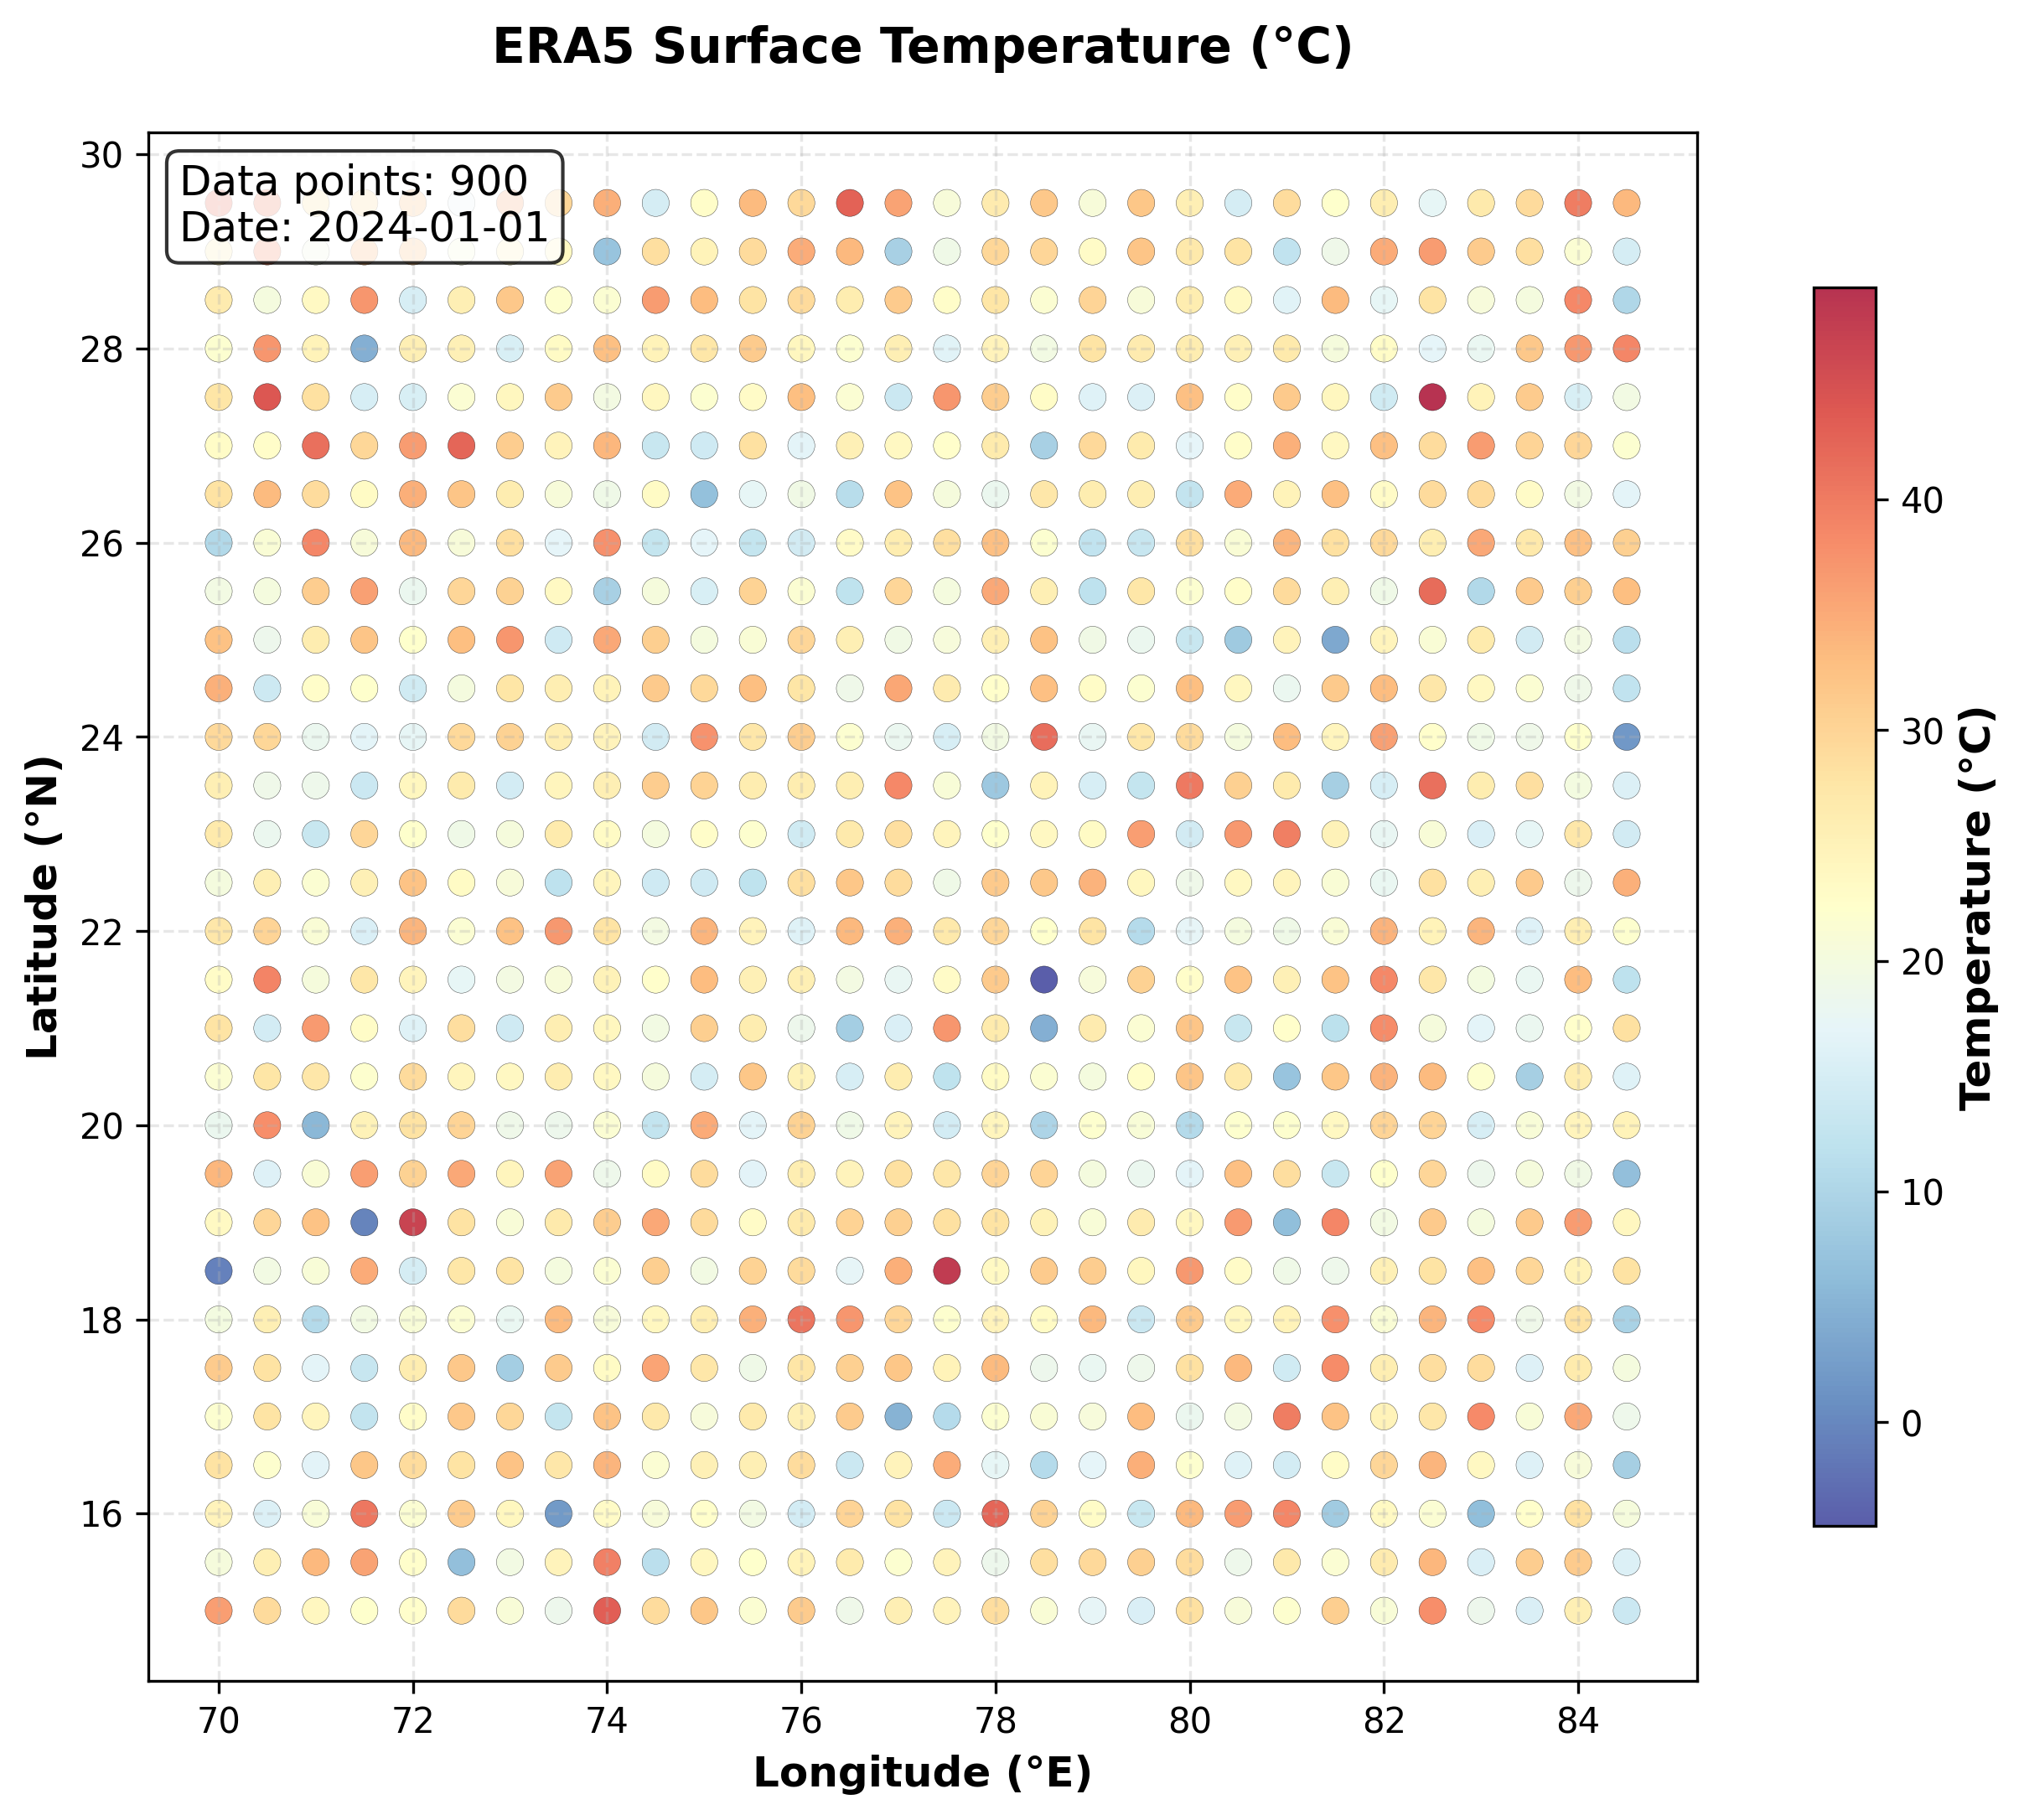

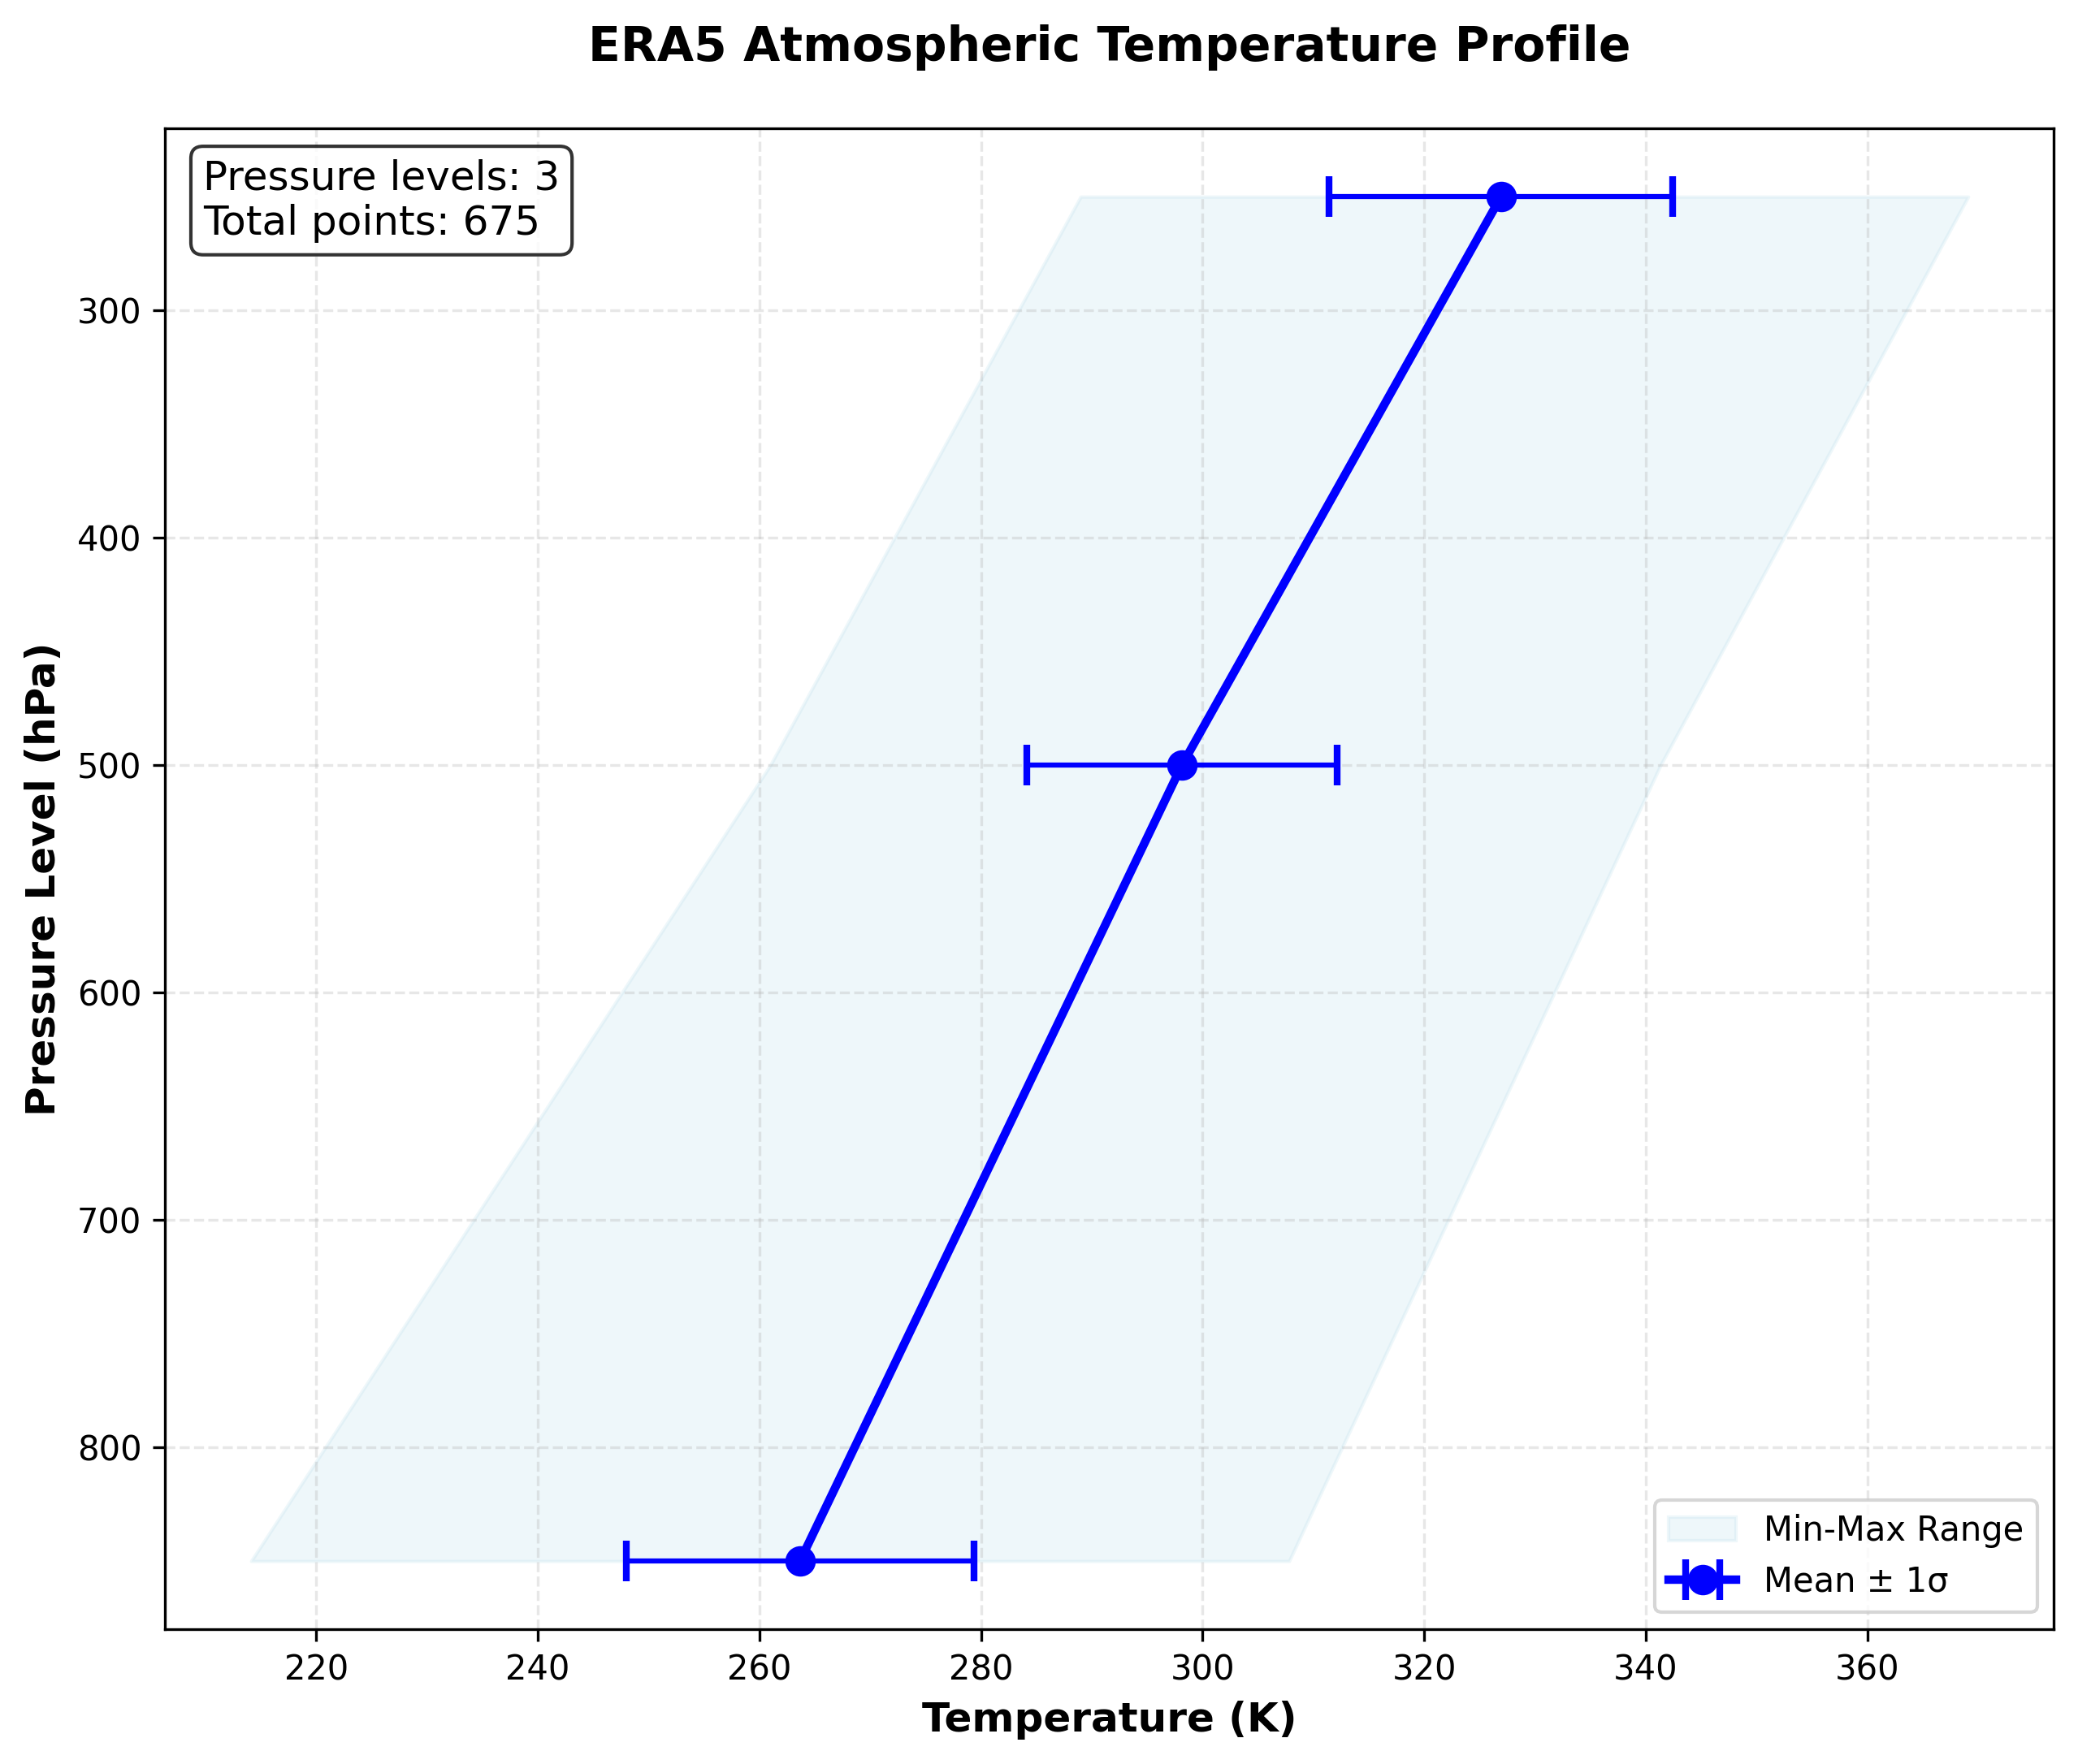

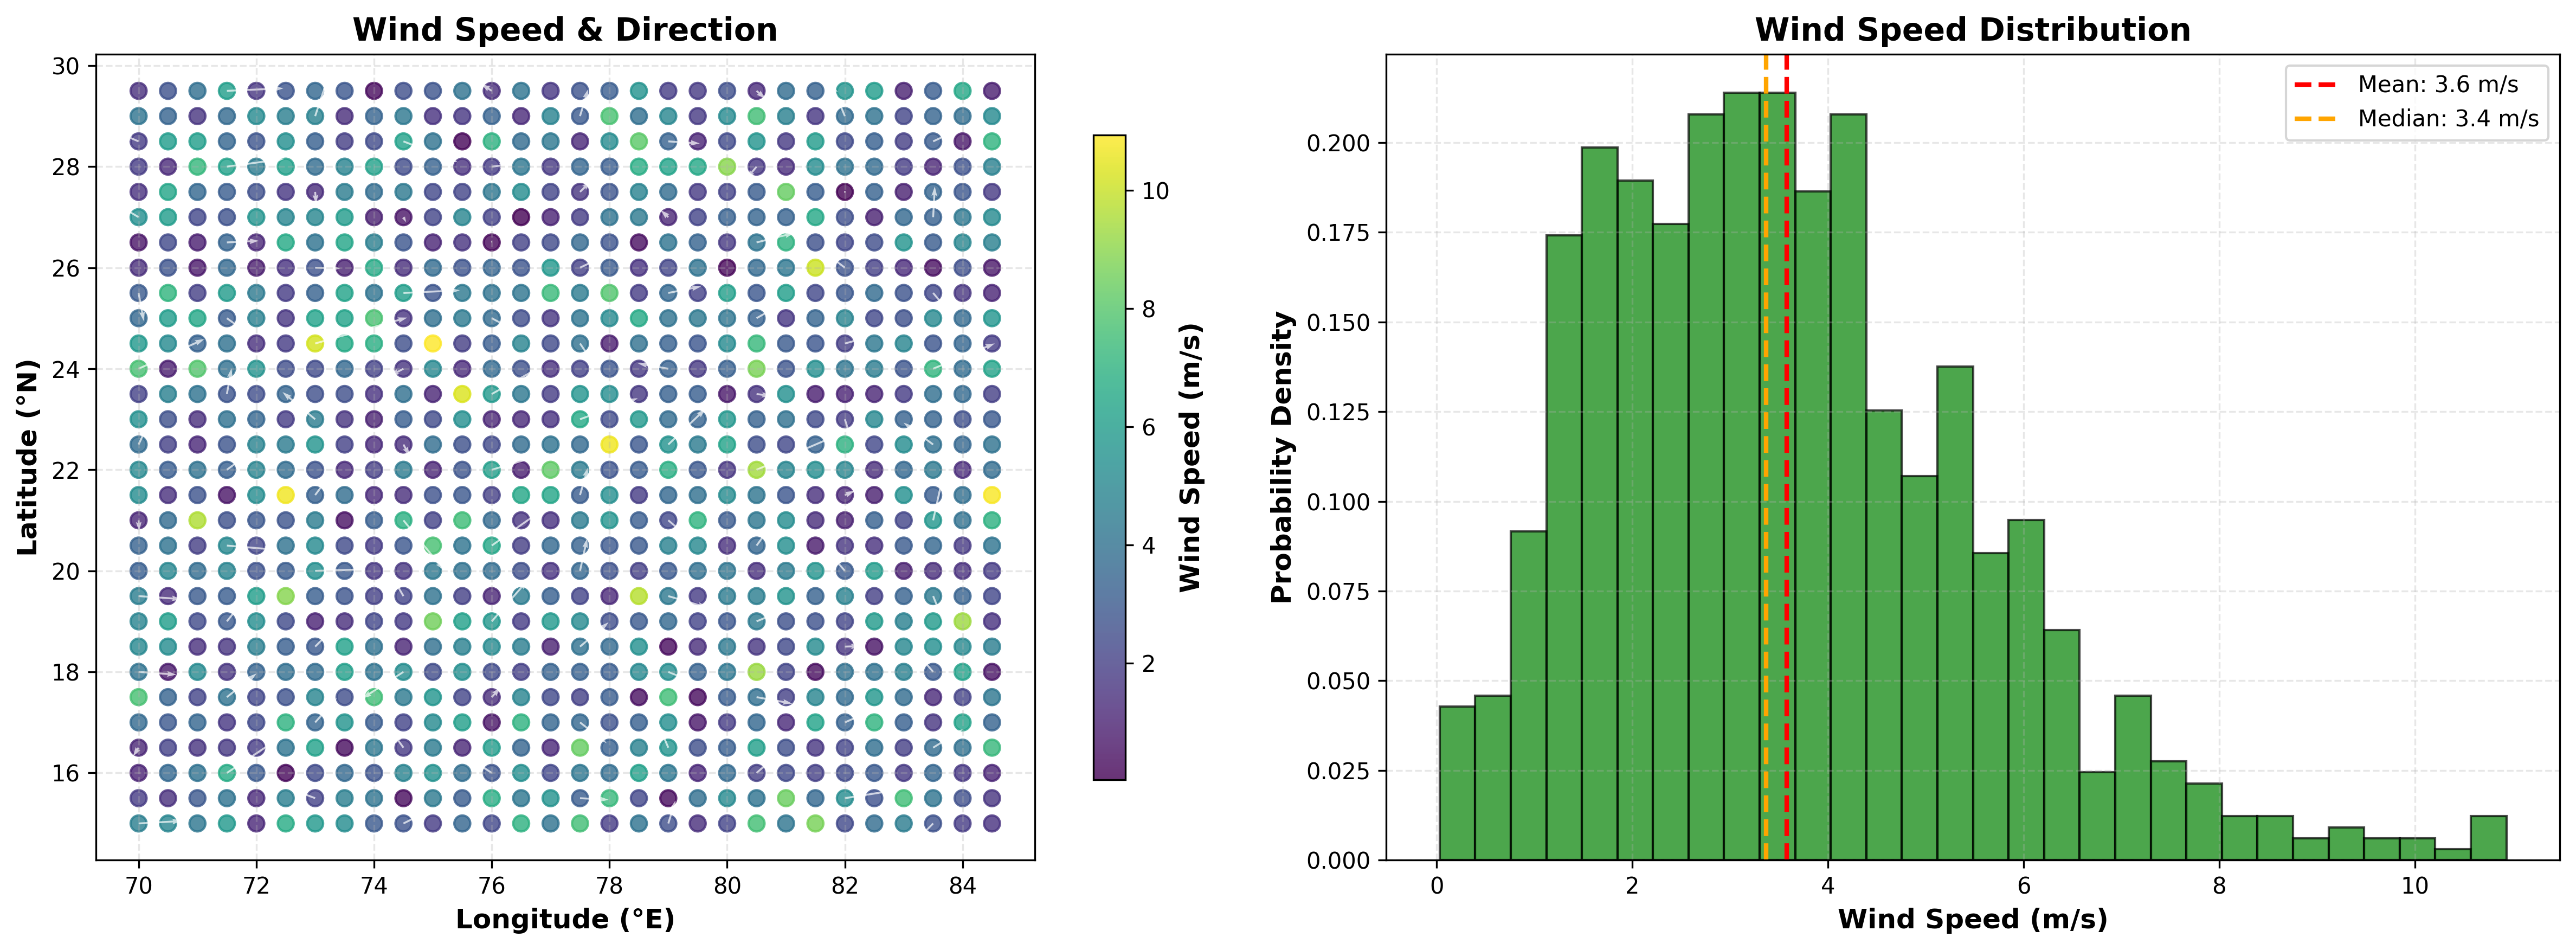

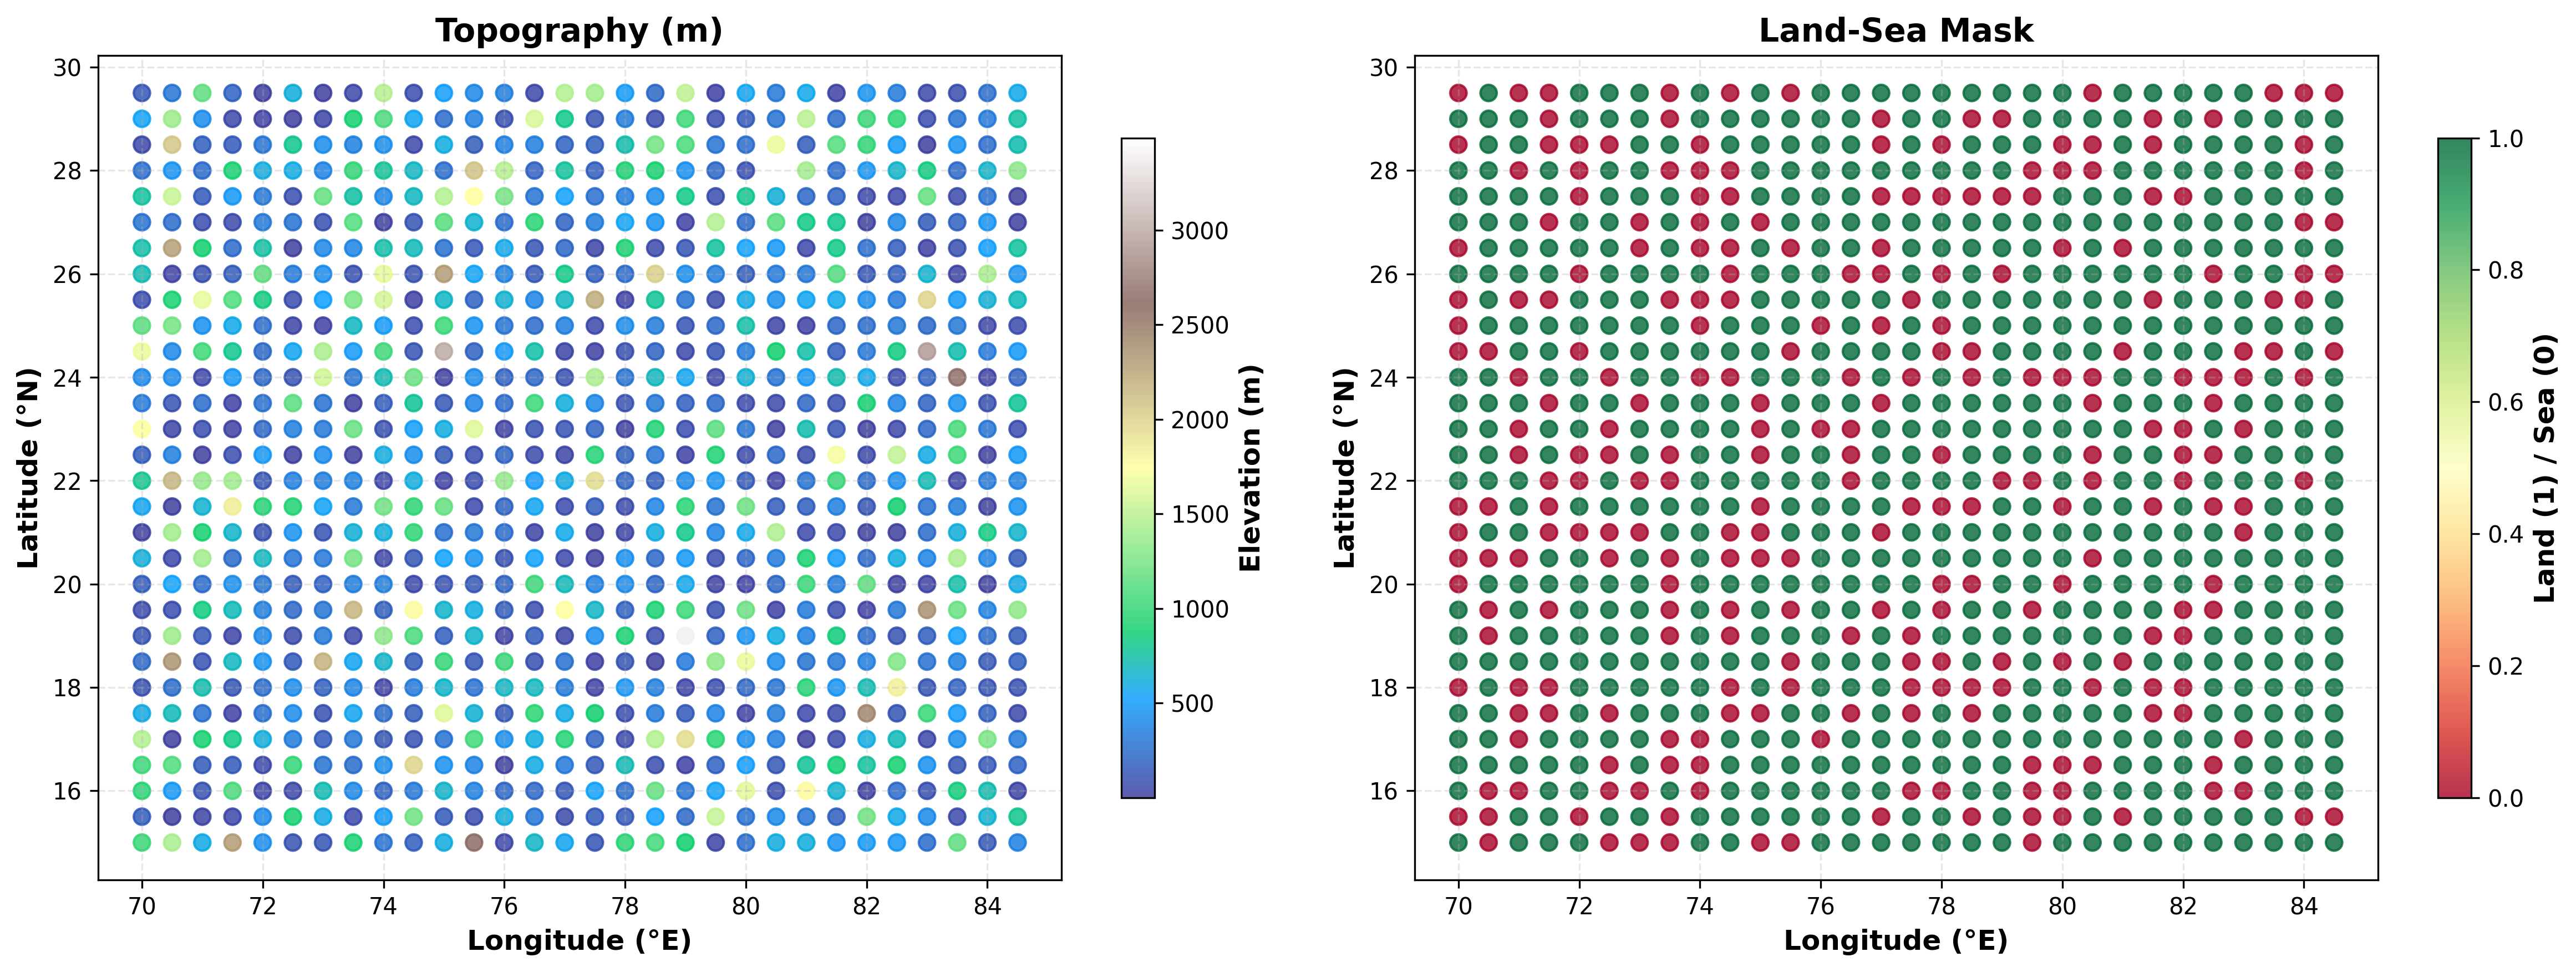


✅ Export completed successfully!
📁 Output directory: ./era5_plots_20250620_145008
📊 Generated files:
   • surface_temperature_map.png
   • atmospheric_temperature_profile.png
   • wind_analysis.png
   • static_data_analysis.png
   • data_summary_report.md
📊 Total output size: 4931.7 KB
✅ Publication-ready plots and exports completed!


In [7]:
# Example 5: Export plots and create publication-ready figures
print("💾 Example 5: Export plots and create publication-ready figures")

def save_publication_plots(surface_df=None, atmospheric_df=None, static_df=None, output_dir="./plots"):
    """
    Create and save publication-ready plots
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    from datetime import datetime
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Set publication style
    plt.style.use('default')
    plt.rcParams.update({
        'figure.figsize': (10, 8),
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })
    
    saved_files = []
    
    # 1. Surface Temperature Map
    if surface_df is not None and '2m_temperature' in surface_df.columns:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        temp_data = surface_df['2m_temperature'].copy()
        if temp_data.mean() > 100:
            temp_data = temp_data - 273.15
            unit = '°C'
        else:
            unit = 'K'
        
        scatter = ax.scatter(
            surface_df['longitude'], 
            surface_df['latitude'],
            c=temp_data, 
            cmap='RdYlBu_r',
            s=60,
            alpha=0.8,
            edgecolors='black',
            linewidth=0.1
        )
        
        ax.set_title(f'ERA5 Surface Temperature ({unit})', fontweight='bold', pad=20)
        ax.set_xlabel('Longitude (°E)', fontweight='bold')
        ax.set_ylabel('Latitude (°N)', fontweight='bold')
        
        cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
        cbar.set_label(f'Temperature ({unit})', fontweight='bold')
        
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_aspect('equal', adjustable='box')
        
        # Add data info
        n_points = len(surface_df)
        time_info = surface_df['time'].iloc[0].strftime('%Y-%m-%d') if 'time' in surface_df.columns else 'Sample Data'
        ax.text(0.02, 0.98, f'Data points: {n_points}\nDate: {time_info}', 
                transform=ax.transAxes, va='top', ha='left',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        filename = os.path.join(output_dir, 'surface_temperature_map.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        saved_files.append(filename)
        plt.show()
        plt.close()
    
    # 2. Atmospheric Temperature Profile
    if atmospheric_df is not None and 'temperature' in atmospheric_df.columns and 'level' in atmospheric_df.columns:
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Calculate statistics by level
        temp_stats = atmospheric_df.groupby('level')['temperature'].agg(['mean', 'std', 'min', 'max']).reset_index()
        temp_stats = temp_stats.sort_values('level', ascending=False)
        
        # Plot mean with error bars
        ax.errorbar(temp_stats['mean'], temp_stats['level'], 
                   xerr=temp_stats['std'], 
                   marker='o', linewidth=2.5, markersize=8,
                   capsize=6, capthick=2, elinewidth=1.5,
                   label='Mean ± 1σ', color='blue')
        
        # Plot range
        ax.fill_betweenx(temp_stats['level'], temp_stats['min'], temp_stats['max'], 
                        alpha=0.2, color='lightblue', label='Min-Max Range')
        
        ax.set_title('ERA5 Atmospheric Temperature Profile', fontweight='bold', pad=20)
        ax.set_xlabel('Temperature (K)', fontweight='bold')
        ax.set_ylabel('Pressure Level (hPa)', fontweight='bold')
        ax.invert_yaxis()
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.legend()
        
        # Add statistics
        n_levels = len(temp_stats)
        n_points = len(atmospheric_df)
        ax.text(0.02, 0.98, f'Pressure levels: {n_levels}\nTotal points: {n_points}', 
                transform=ax.transAxes, va='top', ha='left',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        filename = os.path.join(output_dir, 'atmospheric_temperature_profile.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        saved_files.append(filename)
        plt.show()
        plt.close()
    
    # 3. Wind Analysis
    if surface_df is not None and '10m_u_component_of_wind' in surface_df.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        u_wind = surface_df['10m_u_component_of_wind']
        v_wind = surface_df['10m_v_component_of_wind']
        wind_speed = np.sqrt(u_wind**2 + v_wind**2)
        
        # Wind speed map
        scatter1 = ax1.scatter(
            surface_df['longitude'], surface_df['latitude'],
            c=wind_speed, cmap='viridis', s=50, alpha=0.8
        )
        
        # Add wind vectors (subsample)
        step = max(1, len(surface_df) // 100)
        subset = surface_df.iloc[::step]
        ax1.quiver(subset['longitude'], subset['latitude'],
                  subset['10m_u_component_of_wind'], subset['10m_v_component_of_wind'],
                  scale=100, alpha=0.7, color='white', width=0.002)
        
        ax1.set_title('Wind Speed & Direction', fontweight='bold')
        ax1.set_xlabel('Longitude (°E)', fontweight='bold')
        ax1.set_ylabel('Latitude (°N)', fontweight='bold')
        ax1.grid(True, alpha=0.3, linestyle='--')
        
        cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.8)
        cbar1.set_label('Wind Speed (m/s)', fontweight='bold')
        
        # Wind speed distribution
        ax2.hist(wind_speed, bins=30, alpha=0.7, color='green', edgecolor='black', density=True)
        ax2.axvline(wind_speed.mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {wind_speed.mean():.1f} m/s')
        ax2.axvline(wind_speed.median(), color='orange', linestyle='--', linewidth=2,
                   label=f'Median: {wind_speed.median():.1f} m/s')
        
        ax2.set_title('Wind Speed Distribution', fontweight='bold')
        ax2.set_xlabel('Wind Speed (m/s)', fontweight='bold')
        ax2.set_ylabel('Probability Density', fontweight='bold')
        ax2.grid(True, alpha=0.3, linestyle='--')
        ax2.legend()
        
        plt.tight_layout()
        filename = os.path.join(output_dir, 'wind_analysis.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        saved_files.append(filename)
        plt.show()
        plt.close()
    
    # 4. Static Data Visualization
    if static_df is not None:
        n_plots = 0
        if 'geopotential' in static_df.columns:
            n_plots += 1
        if 'land_sea_mask' in static_df.columns:
            n_plots += 1
        
        if n_plots > 0:
            if n_plots == 1:
                fig, ax = plt.subplots(figsize=(10, 6))
                axes = [ax]
            else:
                fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            
            plot_idx = 0
            
            # Topography
            if 'geopotential' in static_df.columns:
                ax = axes[plot_idx] if n_plots > 1 else axes[0]
                topo_data = static_df['geopotential'].copy()
                
                if topo_data.mean() > 1000:
                    topo_data = topo_data / 9.81
                    unit = 'm'
                else:
                    unit = 'm²/s²'
                
                scatter = ax.scatter(
                    static_df['longitude'], static_df['latitude'],
                    c=topo_data, cmap='terrain', s=50, alpha=0.8
                )
                
                ax.set_title(f'Topography ({unit})', fontweight='bold')
                ax.set_xlabel('Longitude (°E)', fontweight='bold')
                ax.set_ylabel('Latitude (°N)', fontweight='bold')
                ax.grid(True, alpha=0.3, linestyle='--')
                
                cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
                cbar.set_label(f'Elevation ({unit})', fontweight='bold')
                plot_idx += 1
            
            # Land-sea mask
            if 'land_sea_mask' in static_df.columns:
                ax = axes[plot_idx] if n_plots > 1 else axes[0]
                
                scatter = ax.scatter(
                    static_df['longitude'], static_df['latitude'],
                    c=static_df['land_sea_mask'], cmap='RdYlGn', s=50, alpha=0.8
                )
                
                ax.set_title('Land-Sea Mask', fontweight='bold')
                ax.set_xlabel('Longitude (°E)', fontweight='bold')
                ax.set_ylabel('Latitude (°N)', fontweight='bold')
                ax.grid(True, alpha=0.3, linestyle='--')
                
                cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
                cbar.set_label('Land (1) / Sea (0)', fontweight='bold')
            
            plt.tight_layout()
            filename = os.path.join(output_dir, 'static_data_analysis.png')
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            saved_files.append(filename)
            plt.show()
            plt.close()
    
    return saved_files

def create_data_summary_report(surface_df=None, atmospheric_df=None, static_df=None, output_dir="./plots"):
    """
    Create a comprehensive data summary report
    """
    import os
    from datetime import datetime
    
    os.makedirs(output_dir, exist_ok=True)
    
    report = f"""# ERA5 Data Analysis Report
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Data Summary

"""
    
    datasets = [
        ('Surface', surface_df),
        ('Atmospheric', atmospheric_df), 
        ('Static', static_df)
    ]
    
    total_points = 0
    
    for name, df in datasets:
        if df is not None and not df.empty:
            report += f"### {name} Data\n"
            report += f"- **Shape**: {df.shape[0]:,} records × {df.shape[1]} variables\n"
            report += f"- **Variables**: {', '.join(df.columns)}\n"
            
            if 'latitude' in df.columns and 'longitude' in df.columns:
                lat_range = (df['latitude'].min(), df['latitude'].max())
                lon_range = (df['longitude'].min(), df['longitude'].max())
                report += f"- **Spatial Coverage**: {lat_range[0]:.2f}°N to {lat_range[1]:.2f}°N, {lon_range[0]:.2f}°E to {lon_range[1]:.2f}°E\n"
            
            if 'time' in df.columns:
                time_range = (df['time'].min(), df['time'].max())
                report += f"- **Temporal Coverage**: {time_range[0]} to {time_range[1]}\n"
            
            if 'level' in df.columns:
                levels = sorted(df['level'].unique())
                report += f"- **Pressure Levels**: {levels} hPa\n"
            
            # Variable statistics
            numeric_cols = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
            var_cols = [col for col in numeric_cols if col not in ['latitude', 'longitude', 'level']]
            
            if var_cols:
                report += f"- **Variable Statistics**:\n"
                for col in var_cols[:3]:  # Top 3 variables
                    mean_val = df[col].mean()
                    std_val = df[col].std()
                    report += f"  - {col}: {mean_val:.3f} ± {std_val:.3f}\n"
            
            report += "\n"
            total_points += len(df)
    
    report += f"## Overall Summary\n"
    report += f"- **Total Data Points**: {total_points:,}\n"
    report += f"- **Data Quality**: Sample data for demonstration\n"
    report += f"- **Source**: Generated for eranest package testing\n"
    report += f"- **Processing**: eranest Python package\n\n"
    
    report += f"## Generated Files\n"
    report += f"- `surface_temperature_map.png` - Surface temperature spatial distribution\n"
    report += f"- `atmospheric_temperature_profile.png` - Vertical temperature profile\n"
    report += f"- `wind_analysis.png` - Wind speed and direction analysis\n"
    report += f"- `static_data_analysis.png` - Topography and land-sea mask\n"
    report += f"- `data_summary_report.md` - This comprehensive report\n"
    
    # Save report
    report_file = os.path.join(output_dir, 'data_summary_report.md')
    with open(report_file, 'w') as f:
        f.write(report)
    
    return report_file

# Execute plotting and export functions
try:
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    
    print("\n📈 Creating publication-ready plots and exports...")
    
    # Check available data
    available_data = {}
    data_summary = []
    
    if 'surface_df' in locals() and surface_df is not None:
        available_data['surface'] = surface_df
        data_summary.append(f"Surface: {surface_df.shape}")
    
    if 'atmospheric_df' in locals() and atmospheric_df is not None:
        available_data['atmospheric'] = atmospheric_df
        data_summary.append(f"Atmospheric: {atmospheric_df.shape}")
    
    if 'static_df' in locals() and static_df is not None:
        available_data['static'] = static_df
        data_summary.append(f"Static: {static_df.shape}")
    
    if available_data:
        print(f"📊 Available datasets: {', '.join(data_summary)}")
        
        # Create output directory with timestamp
        from datetime import datetime
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        output_dir = f"./era5_plots_{timestamp}"
        
        print(f"📁 Creating plots in directory: {output_dir}")
        
        # Save publication-ready plots
        saved_files = save_publication_plots(
            surface_df=available_data.get('surface'),
            atmospheric_df=available_data.get('atmospheric'),
            static_df=available_data.get('static'),
            output_dir=output_dir
        )
        
        # Create summary report
        report_file = create_data_summary_report(
            surface_df=available_data.get('surface'),
            atmospheric_df=available_data.get('atmospheric'),
            static_df=available_data.get('static'),
            output_dir=output_dir
        )
        
        print(f"\n✅ Export completed successfully!")
        print(f"📁 Output directory: {output_dir}")
        print(f"📊 Generated files:")
        for file in saved_files + [report_file]:
            print(f"   • {os.path.basename(file)}")
        
        # Display directory contents
        if os.path.exists(output_dir):
            files = os.listdir(output_dir)
            total_size = sum(os.path.getsize(os.path.join(output_dir, f)) for f in files) / 1024  # KB
            print(f"📊 Total output size: {total_size:.1f} KB")
    
    else:
        print("⚠️ No data available for export")
        print("💡 Run the data generation cells first")

except Exception as e:
    print(f"❌ Export error: {e}")
    import traceback
    traceback.print_exc()

print("✅ Publication-ready plots and exports completed!")